# Comparando *Neural Prophet* e *Facebook Prophet*

Complemento de projeto onde irei comparar as bibliotecas *Neural Prophet* e *Facebook Prophet*.

## Instalando a biblioteca *Neural Prophet*

In [1]:
!pip install git+https://github.com/ourownstory/neural_prophet.git


  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-omhxmf8x
  Running command git clone -q https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-omhxmf8x
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 5.7MB/s 
  Created wheel for neuralprophet: filename=neuralprophet-0.2.8-cp36-none-any.whl size=56717 sha256=b983471a23db3d28050470eb613b0fb8e9a8a6da7e0a729f0fe351d0f581de9b
  Stored in directory: /tmp/pip-ephem-wheel-cache-qqkq7pdi/wheels/5a/29/25/58347b486c135e3aaa41f629bace08cfb3e92d08c65d2b4acf
Successfully built neuralprophet
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


## Importando as biblioteca

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from neuralprophet import NeuralProphet
from statsmodels.stats.stattools import jarque_bera
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import max_error, mean_squared_log_error, median_absolute_error

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.




## Importando a base de dados



In [3]:
bebidas = pd.read_csv('MRTSSM4453USN.csv')

Renomeando as colunas.

In [4]:
bebidas.columns = ['ds','y']

Separando dados de treino e validação (últimos 24 meses).

In [6]:
bebida_treino = bebidas[:322]
bebida_valida = bebidas[323:347]

## Criando os modelos

Instanciando e treinando modelo da biblioteca **Neural Prophet**.

In [7]:
m1 = NeuralProphet(seasonality_mode='multiplicative')
m1.fit(bebida_treino, freq='M')

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 99
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning:

Setting attributes on ParameterDict is not supported.




  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 1.23E-01
Epoch[99/99]: 100%|██████████| 99/99 [00:08<00:00, 12.29it/s, SmoothL1Loss=0.000458, MAE=84.1, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.314987,2422.271884,0.0
1,0.161992,1701.210223,0.0
2,0.099898,1332.228293,0.0
3,0.062508,1055.101053,0.0
4,0.039620,838.409780,0.0
...,...,...,...
94,0.000472,85.769923,0.0
95,0.000470,84.799793,0.0
96,0.000461,84.291160,0.0
97,0.000458,84.133292,0.0


Treinando o modelo da biblioteca **Facebook Prophet**.

In [8]:
m2 = Prophet(seasonality_mode='multiplicative').fit(bebida_treino)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Gerando as previsões

Previsões do modelo **Neural Prophet**.

In [9]:
future = m1.make_future_dataframe(bebida_treino, periods=24)
forecast = m1.predict(future)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning:

Setting attributes on ParameterDict is not supported.



Setting attributes on ParameterDict is not supported.




In [11]:
forecast

,ds,y,yhat1,residual1,trend,season_yearly
0,2018-10-31,None,4771.498047,NaN,4771.474121,0.000007
1,2018-11-30,None,6820.742676,NaN,4784.704102,0.558495
2,2018-12-31,None,3993.007568,NaN,4798.374512,-0.220091
3,2019-01-31,None,3958.254395,NaN,4812.045898,-0.232456
4,2019-02-28,None,4453.195312,NaN,4824.393555,-0.100725
5,2019-03-31,None,4487.868164,NaN,4838.064453,-0.094675
6,2019-04-30,None,4914.353027,NaN,4851.294434,0.016987
7,2019-05-31,None,4986.614258,NaN,4864.965820,0.032650
8,2019-06-30,None,5095.814453,NaN,4878.195801,0.058201
9,2019-07-31,None,5088.747070,NaN,4891.866211,0.052463


Previsões do **Facebook Prophet**.

In [10]:
futuro=m2.make_future_dataframe(periods=24, freq='M')
previsoes=m2.predict(futuro)

In [12]:
previsoes

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1992-01-01,1777.500350,1407.991937,1570.798169,1777.500350,1777.500350,-0.159490,-0.159490,-0.159490,-0.159490,-0.159490,-0.159490,0.0,0.0,0.0,1494.007400
1,1992-02-01,1779.532645,1439.097164,1605.740308,1779.532645,1779.532645,-0.144602,-0.144602,-0.144602,-0.144602,-0.144602,-0.144602,0.0,0.0,0.0,1522.208510
2,1992-03-01,1781.433824,1593.096571,1757.900155,1781.433824,1781.433824,-0.060161,-0.060161,-0.060161,-0.060161,-0.060161,-0.060161,0.0,0.0,0.0,1674.261102
3,1992-04-01,1783.466119,1583.521676,1752.401781,1783.466119,1783.466119,-0.065617,-0.065617,-0.065617,-0.065617,-0.065617,-0.065617,0.0,0.0,0.0,1666.440676
4,1992-05-01,1785.432856,1737.667997,1902.532584,1785.432856,1785.432856,0.019184,0.019184,0.019184,0.019184,0.019184,0.019184,0.0,0.0,0.0,1819.684562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2020-05-31,5199.145250,5143.528927,5329.779258,5173.036522,5226.503501,0.007173,0.007173,0.007173,0.007173,0.007173,0.007173,0.0,0.0,0.0,5236.439364
342,2020-06-30,5215.234738,5392.223250,5575.344836,5186.324260,5245.146558,0.051184,0.051184,0.051184,0.051184,0.051184,0.051184,0.0,0.0,0.0,5482.170808
343,2020-07-31,5231.860542,5223.609503,5403.923847,5200.707003,5264.059331,0.015620,0.015620,0.015620,0.015620,0.015620,0.015620,0.0,0.0,0.0,5313.580448
344,2020-08-31,5248.486346,4963.356127,5151.652777,5214.550230,5284.261599,-0.036355,-0.036355,-0.036355,-0.036355,-0.036355,-0.036355,0.0,0.0,0.0,5057.676103


### Comparando os resultados.

Primeiro irei reindexar as previsões do **Facebook Prophet** para que tenham o mesmo índice da base de validação.

In [13]:
validacao=pd.DataFrame({'ds':bebida_valida['ds']})
saida=m2.predict(validacao)
saida.index=bebida_valida.index

In [14]:
saida[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
323,2018-12-01,6694.329937,6606.650873,6776.444295
324,2019-01-01,4148.792440,4068.030825,4233.443539
325,2019-02-01,4194.834317,4107.950523,4277.625968
326,2019-03-01,4616.277360,4533.828127,4700.313792
327,2019-04-01,4615.181562,4534.728802,4708.876324
328,2019-05-01,5073.195054,4994.914135,5153.117412
329,2019-06-01,5040.988144,4952.928700,5126.387550
330,2019-07-01,5269.841353,5186.364042,5353.360428
331,2019-08-01,5114.503887,5026.961747,5195.533775
332,2019-09-01,4863.345273,4774.359012,4948.018249


reindexarei também as previsões do modelo **Neural Prophet**.

In [15]:
forecast.index = bebida_valida.index

Comparando visualmente os resultados vemos que as previsões do **Facebook Prophet** estão mais alinhadas com a base de validação.

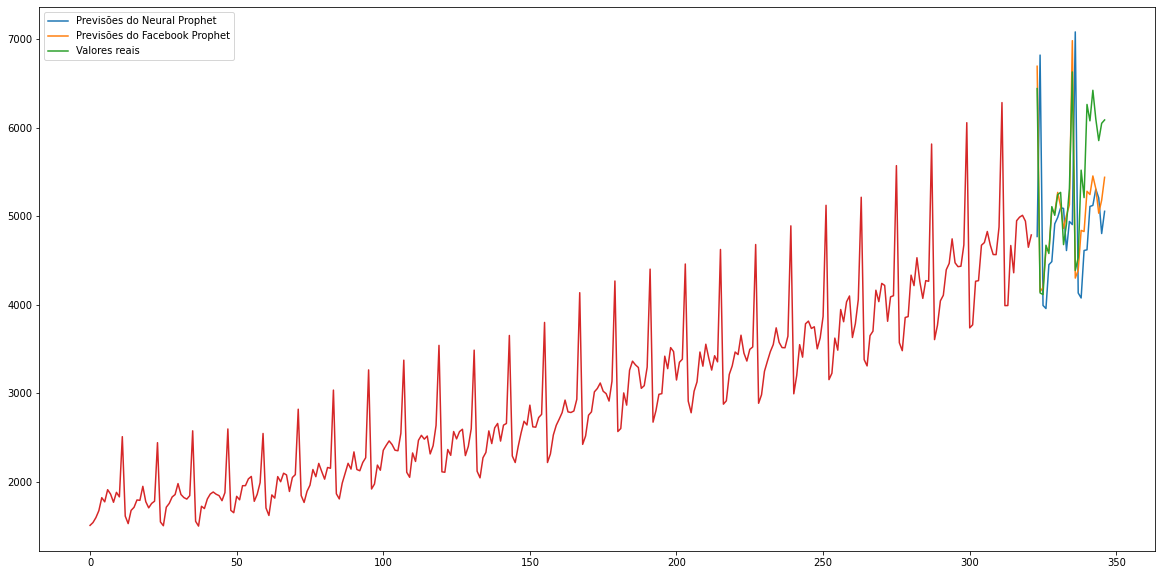

In [16]:
forecast['yhat1'].plot(figsize=(20,10))
saida['yhat'].plot()
bebida_valida['y'].plot()
bebida_treino['y'].plot()
plt.legend(['Previsões do Neural Prophet','Previsões do Facebook Prophet','Valores reais'], fontsize=10);

Visualizando com uma maior proximidade.

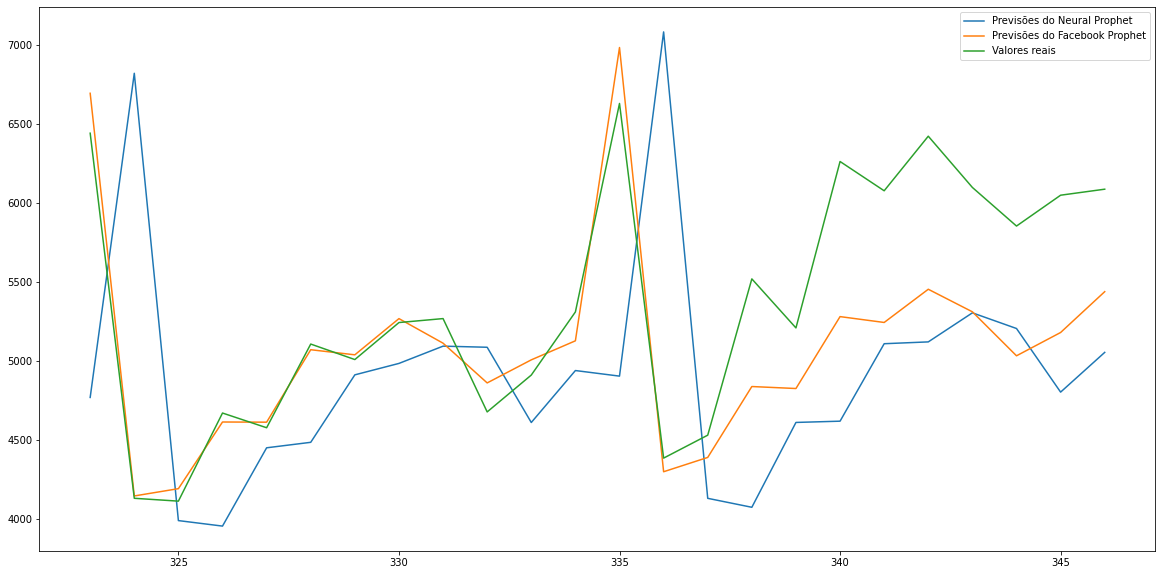

In [17]:
forecast['yhat1'].plot(figsize=(20,10))
saida['yhat'].plot()
bebida_valida['y'].plot()
plt.legend(['Previsões do Neural Prophet','Previsões do Facebook Prophet','Valores reais'], fontsize=10);

Com o histograma podemos ver que o histogram das previsões do **Facebook Prophet** estão mais próximo do histograma dos valores de validação, do que o histograma das previsões do **Neural Prophet**.

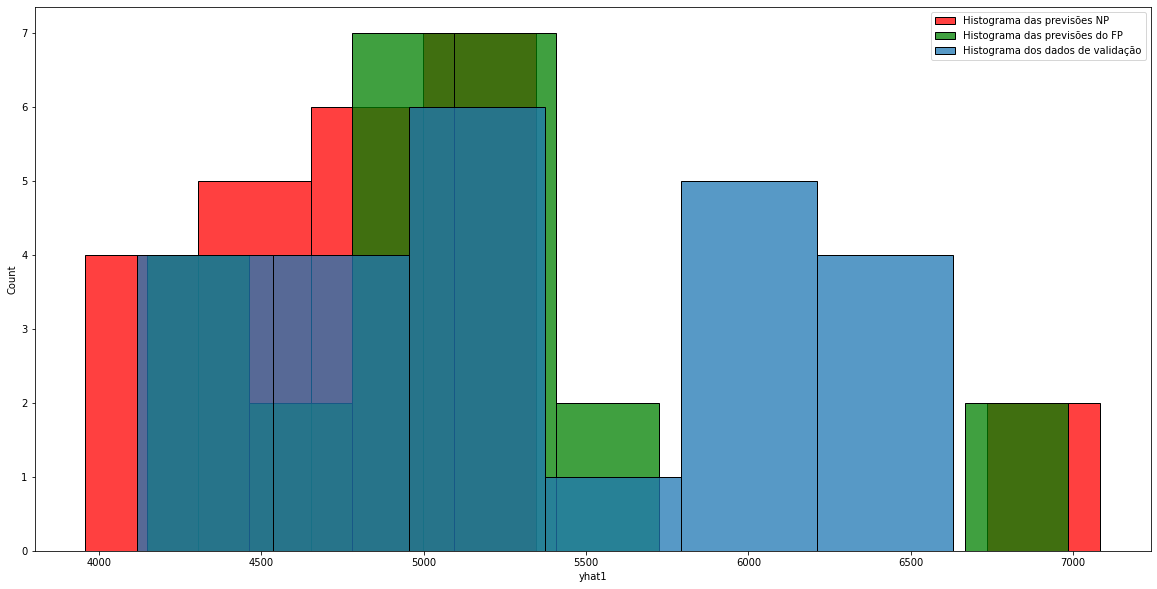

In [22]:
plt.figure(figsize=(20,10))
sns.histplot(forecast['yhat1'], color = 'red')
sns.histplot(saida['yhat'], color = 'green')
sns.histplot(bebida_valida['y'])
plt.legend(['Histograma das previsões NP','Histograma das previsões do FP','Histograma dos dados de validação'], fontsize=10);

#### Comparação métrica

Usarei agora alguma métricas de avaliação para ter um comparação mais objetiva.

Comparando as métricas, vê-se que o desempenho do **Facebook Prophet** foi bem melhor que o do **Neural Prophet**.

In [27]:
print('Métricas de Avaliação do Neural Prophet')
print(''*254)
print('Erro logarítmico médio quadrático :',mean_squared_log_error(bebida_valida['y'],forecast['yhat1']))
print('Erro médio quadrático :',mean_squared_error(bebida_valida['y'],forecast['yhat1']))
print('Raiz do erro médio quadrático :',mean_squared_error(bebida_valida['y'],forecast['yhat1'])**0.5)
print('Erro absoluto médio :',mean_absolute_error(bebida_valida['y'],forecast['yhat1']))
print('Erro absoluto mediano :',median_absolute_error(bebida_valida['y'],forecast['yhat1']))
print(''*254)
print('Métricas de Avaliação do Fcaebook Prophet')
print(''*254)
print('Erro logarítmico médio quadrático :',mean_squared_log_error(bebida_valida['y'],saida['yhat']))
print('Erro médio quadrático :',mean_squared_error(bebida_valida['y'],saida['yhat']))
print('Raiz do erro médio quadrático :',mean_squared_error(bebida_valida['y'],saida['yhat'])**0.5)
print('Erro absoluto médio :',mean_absolute_error(bebida_valida['y'],saida['yhat']))
print('Erro absoluto mediano :',median_absolute_error(bebida_valida['y'],saida['yhat']))

Métricas de Avaliação do Neural Prophet

Erro logarítmico médio quadrático : 0.04733474228835797
Erro médio quadrático : 1385455.6583631188
Raiz do erro médio quadrático : 1177.053804362026
Erro absoluto médio : 918.1347859700521
Erro absoluto mediano : 681.209716796875

Métricas de Avaliação do Fcaebook Prophet

Erro logarítmico médio quadrático : 0.007878730421569358
Erro médio quadrático : 249752.30258414705
Raiz do erro médio quadrático : 499.7522411997239
Erro absoluto médio : 362.19091942775157
Erro absoluto mediano : 182.91207625210154
